### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\rkbra\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('datasets/liver.csv')

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease).

In [3]:
df.shape

(583, 11)

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
from sklearn.utils import shuffle
df = shuffle(df)

df.reset_index(inplace=True, drop=True) 
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,39,Male,0.6,0.2,188,28,43,8.1,3.3,0.6,1
1,60,Male,0.7,0.2,174,32,14,7.8,4.2,1.1,2
2,60,Male,2.2,1.0,271,45,52,6.1,2.9,0.9,2
3,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.5,1
4,35,Male,0.7,0.2,198,42,30,6.8,3.4,1.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here is the observation from the dataset:
* Only gender is non-numeric veriable. All others are numeric.
* There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 2 indicates the patient does not have liver disease.

In [7]:
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio' , 'Target']

In [8]:
# initially 1 for liver disease; 2 for no liver disease
df["Target"]=df["Target"].map({1:1,2:0})

In [9]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [10]:
df.isna().mean()

Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.006861
Target                        0.000000
dtype: float64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

### Target Variable

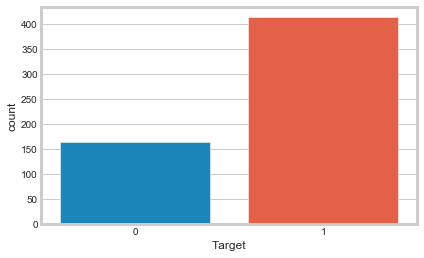

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=df) 

In [14]:
df['Target'].value_counts()

1    414
0    165
Name: Target, dtype: int64

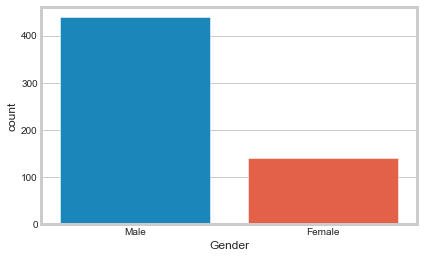

In [15]:
sns.countplot(x='Gender',data=df)

In [16]:
df['Gender'].value_counts()

Male      439
Female    140
Name: Gender, dtype: int64

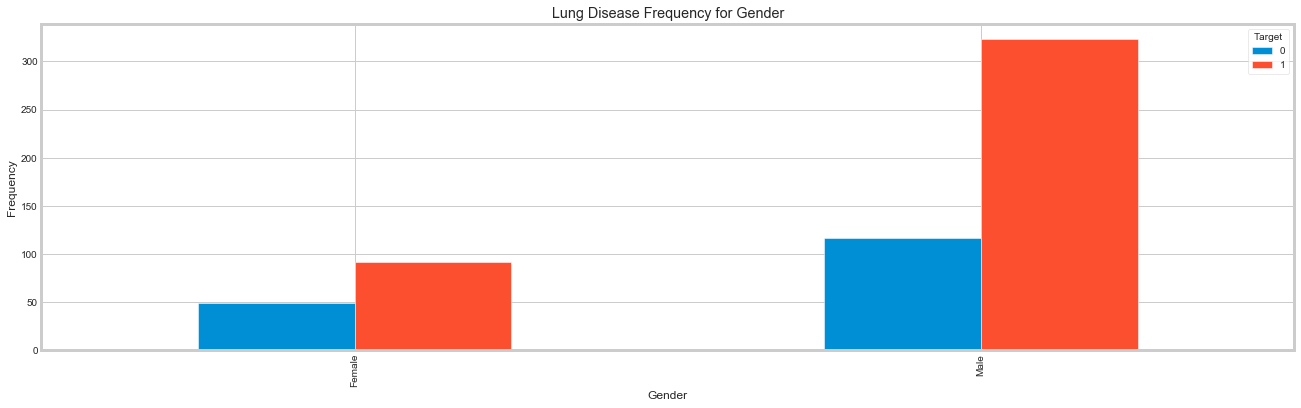

In [17]:
pd.crosstab(df.Gender,df.Target).plot(kind="bar",figsize=(20,6)) # 1 for liver disease; 2 for no liver disease
plt.title('Lung Disease Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

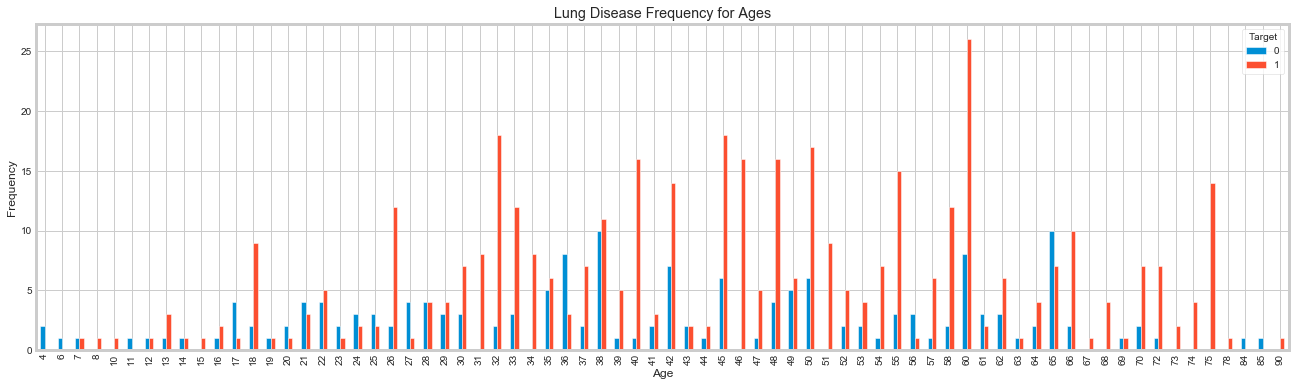

In [18]:
pd.crosstab(df.Age,df.Target).plot(kind="bar",figsize=(20,6))
plt.title('Lung Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

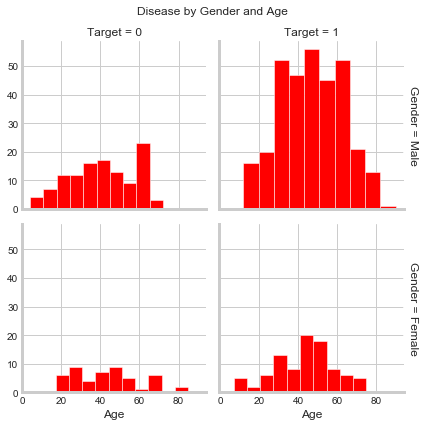

In [19]:
g = sns.FacetGrid(df, col="Target", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

### Data Distribution

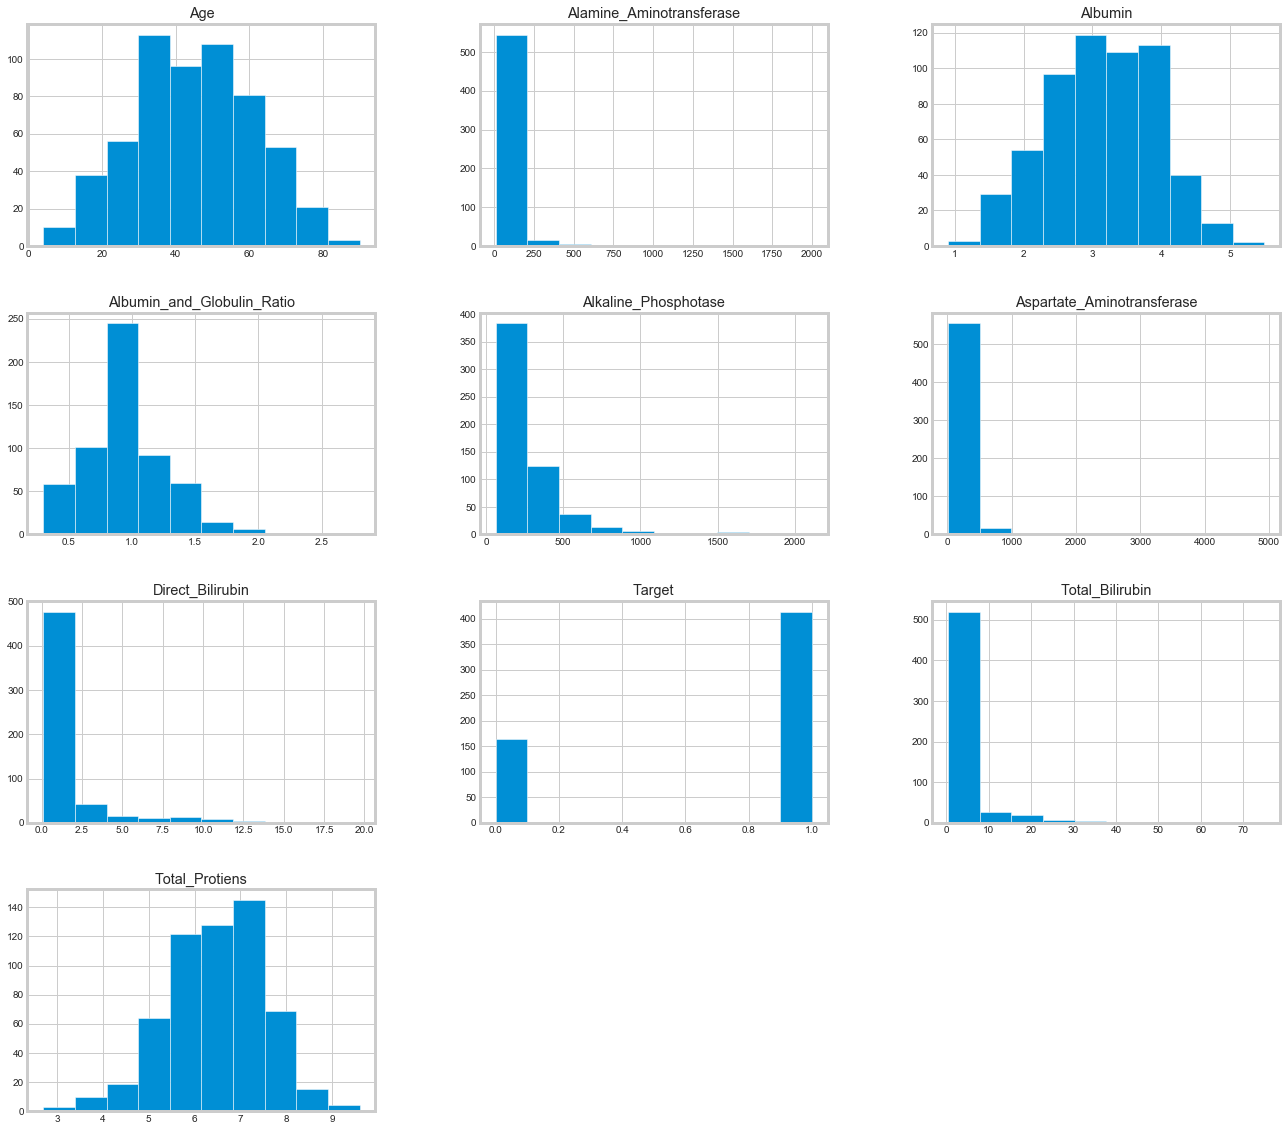

In [20]:
df.hist(figsize=(20,20));

### Correlation

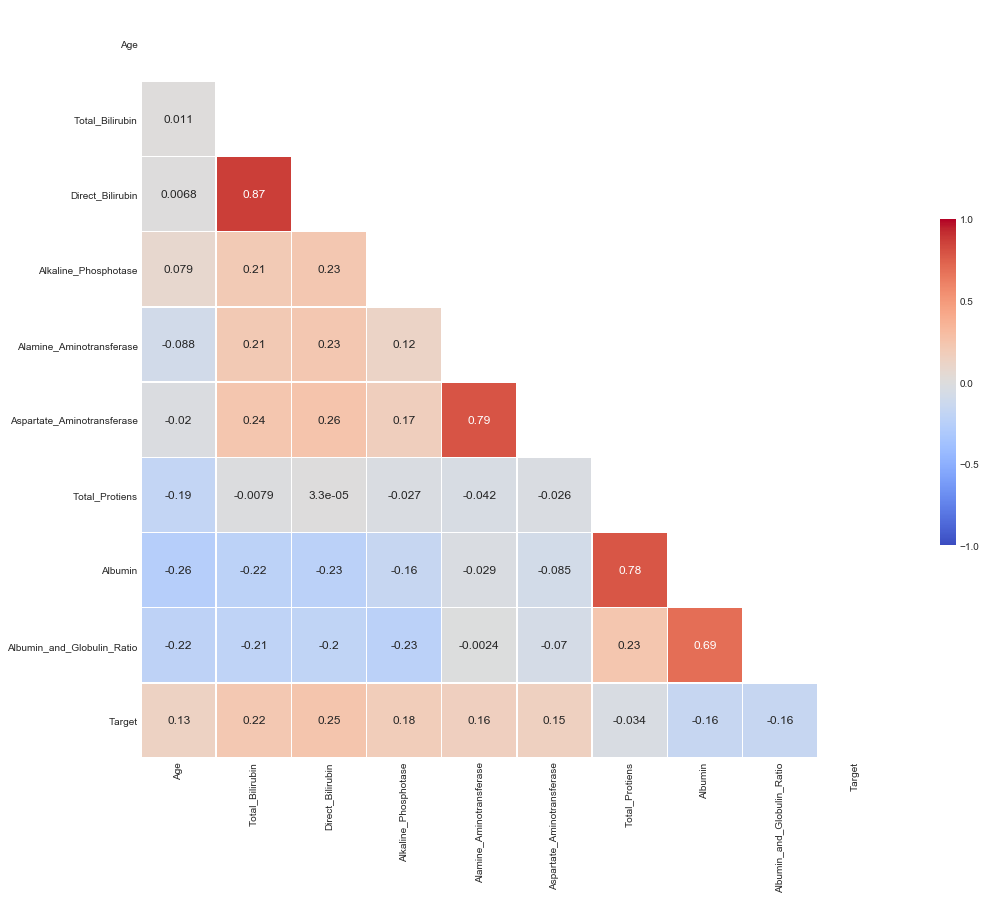

In [21]:
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [22]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

Multi-colinearity exists among features:
* Direct_Bilirubin & Total_Bilirubin
* Alamine_Aminotransferase & Aspartate_Aminotransferase
* Total_Protiens & Albumin
* Albumin_and_Globulin_Ratio & Albumin

I'm going to keep the follwing features:
* Total_Bilirubin
* Alamine_Aminotransferase
* Total_Protiens
* Albumin_and_Globulin_Ratio
* Albumin

In [23]:
df = df.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase'], 1)

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
df.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target,Gender_Male
0,39,0.6,188,28,8.1,3.3,0.6,1,1
1,60,0.7,174,32,7.8,4.2,1.1,0,1
2,60,2.2,271,45,6.1,2.9,0.9,0,1
3,72,0.7,196,20,5.8,2.0,0.5,1,1
4,35,0.7,198,42,6.8,3.4,1.0,1,1


In [26]:
# initially: 1 for liver disease; 2 for no liver disease
df['Target'] = df['Target'].apply(lambda x: 0 if x==2 else x)

In [27]:
# 1 for liver disease; 0 for no liver disease
df.Target.value_counts()

1    414
0    165
Name: Target, dtype: int64

### Log Transformation

In [28]:
X = df.drop('Target', 1)
y = df.Target

In [29]:
X.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,39,0.6,188,28,8.1,3.3,0.6,1
1,60,0.7,174,32,7.8,4.2,1.1,1
2,60,2.2,271,45,6.1,2.9,0.9,1
3,72,0.7,196,20,5.8,2.0,0.5,1
4,35,0.7,198,42,6.8,3.4,1.0,1


In [30]:
for var in X.columns:
    X[var] = np.log1p(X[var])

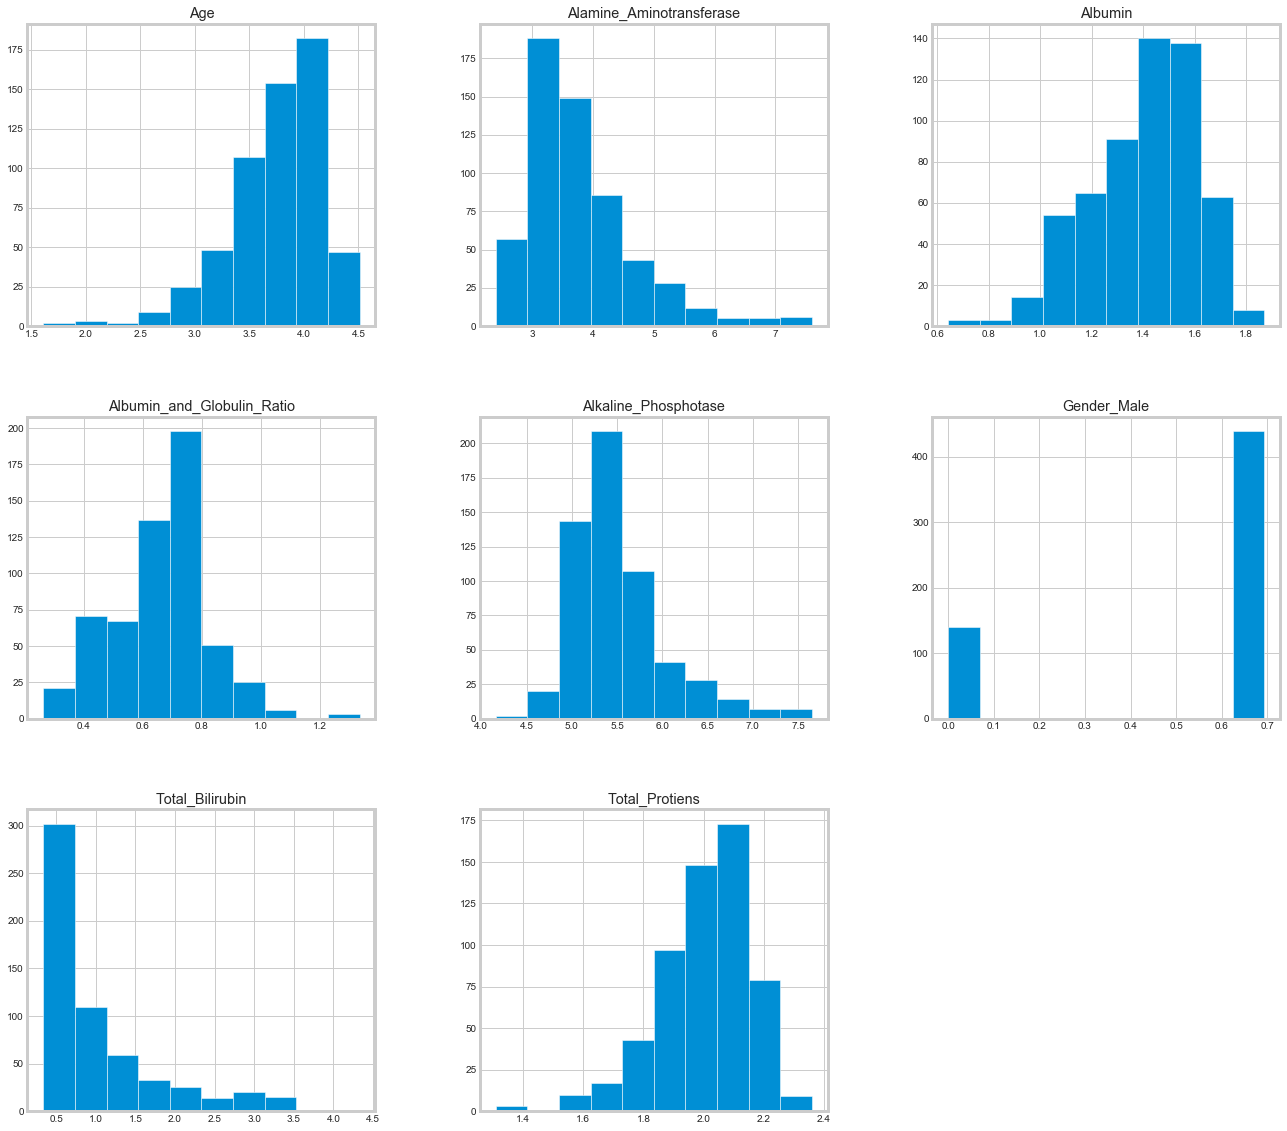

In [31]:
X.hist(figsize=(20,20));

## Train Test Split

In [32]:
sm=SMOTE()

X, y = sm.fit_sample(X, y)

***Data Split 1: all of our final dataset, without scaling***

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
# X_train, y_train = sm.fit_sample(X_train, y_train)
(X_train.shape, X_test.shape)

((579, 8), (249, 8))

***Data Split 2: all of our final dataset, with scaling***

In [34]:
X2 = X.copy()
sc = StandardScaler()

X2[X.columns] = sc.fit_transform(X[X.columns])
y2 = y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.25,random_state=42)
# X2_train, y2_train = sm.fit_sample(X2_train, y2_train)

## Models

### Logistic Regression

In [35]:
lr = LogisticRegression(random_state=42)
score = cross_val_score(lr, X_train, y_train, scoring='roc_auc', n_jobs=-1)
score.mean()

0.7638348955885956

In [36]:
score = cross_val_score(lr, X2_train, y2_train, scoring='roc_auc', n_jobs=-1)
score.mean()

0.7542673775013722

In [37]:
lr.fit(X2, y2)

LogisticRegression(random_state=42)

Logistic Regression Training Score: 
 50.43
Logistic Regression Test Score: 
 49.0
Coefficient: 
 [[ 0.25971051  0.63805901  0.27630197  0.67801061  0.90576721 -1.17647286
   0.33854461  0.03995141]]
Intercept: 
 [0.17473654]
Accuracy: 
 0.4899598393574297
Confusion Matrix: 
 [[  0 127]
 [  0 122]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.49      1.00      0.66       122

    accuracy                           0.49       249
   macro avg       0.24      0.50      0.33       249
weighted avg       0.24      0.49      0.32       249



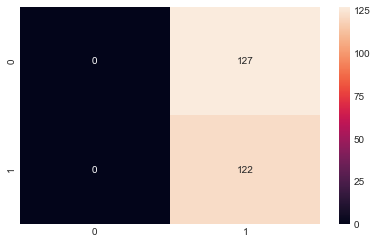

In [38]:
#Predict Output
lr_predict = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test)

logreg_score = round(lr.score(X_train, y_train) * 100, 2)
logreg_score_test = round(lr.score(X_test, y_test) * 100, 2)

#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Coefficient: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
print('Accuracy: \n', accuracy_score(y_test,lr_predict))
print('Confusion Matrix: \n', confusion_matrix(y_test,lr_predict))
print('Classification Report: \n', classification_report(y_test,lr_predict))

sns.heatmap(confusion_matrix(y_test,lr_predict),annot=True,fmt="d")

In [39]:
conf_matrix=confusion_matrix(y_test,lr_predict)

total=sum(sum(conf_matrix))

lr_sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', lr_sensitivity )

lr_specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', lr_specificity)

Sensitivity :  nan
Specificity :  0.4899598393574297


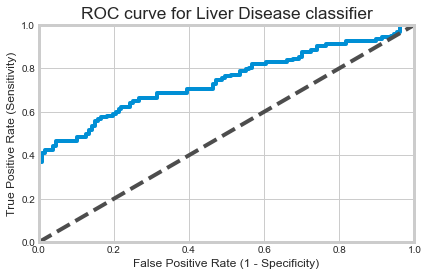

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, lr_predict_proba[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Liver Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [41]:
lr_auc = auc(fpr, tpr)
lr_auc

0.7435136181747773

In [42]:
coeff_df = pd.DataFrame(X2.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])
pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Total_Protiens,0.905767
3,Alamine_Aminotransferase,0.678011
1,Total_Bilirubin,0.638059
6,Albumin_and_Globulin_Ratio,0.338545
2,Alkaline_Phosphotase,0.276302
0,Age,0.259711
7,Gender_Male,0.039951
5,Albumin,-1.176473


### Gaussian Naive Bayes

Gaussian Score: 
 69.95
Gaussian Test Score: 
 72.29
Accuracy: 
 0.7228915662650602
[[114  13]
 [ 56  66]]
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       127
           1       0.84      0.54      0.66       122

    accuracy                           0.72       249
   macro avg       0.75      0.72      0.71       249
weighted avg       0.75      0.72      0.71       249



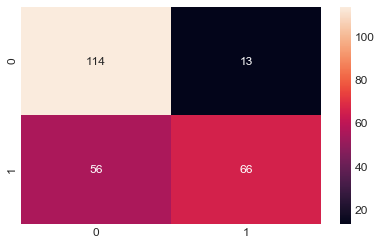

In [43]:
gaussian = GaussianNB()
gaussian.fit(X, y)
#Predict Output
gauss_predicted = gaussian.predict(X_test)
gnb_predict_proba = gaussian.predict_proba(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [44]:
conf_matrix=confusion_matrix(y_test,gauss_predicted)

total=sum(sum(conf_matrix))

gnb_sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', gnb_sensitivity )

gnb_specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', gnb_specificity)

Sensitivity :  0.6705882352941176
Specificity :  0.8354430379746836


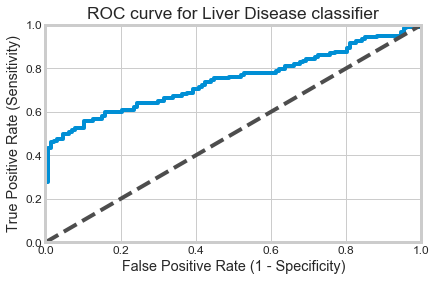

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, gnb_predict_proba[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Liver Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [46]:
gnb_auc = auc(fpr, tpr)
gnb_auc

0.7441590293016652

## KNNClassififer

In [47]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X2_train,y2_train,scoring='roc_auc',cv=10)
    knn_scores.append(np.round(score.mean(), 3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

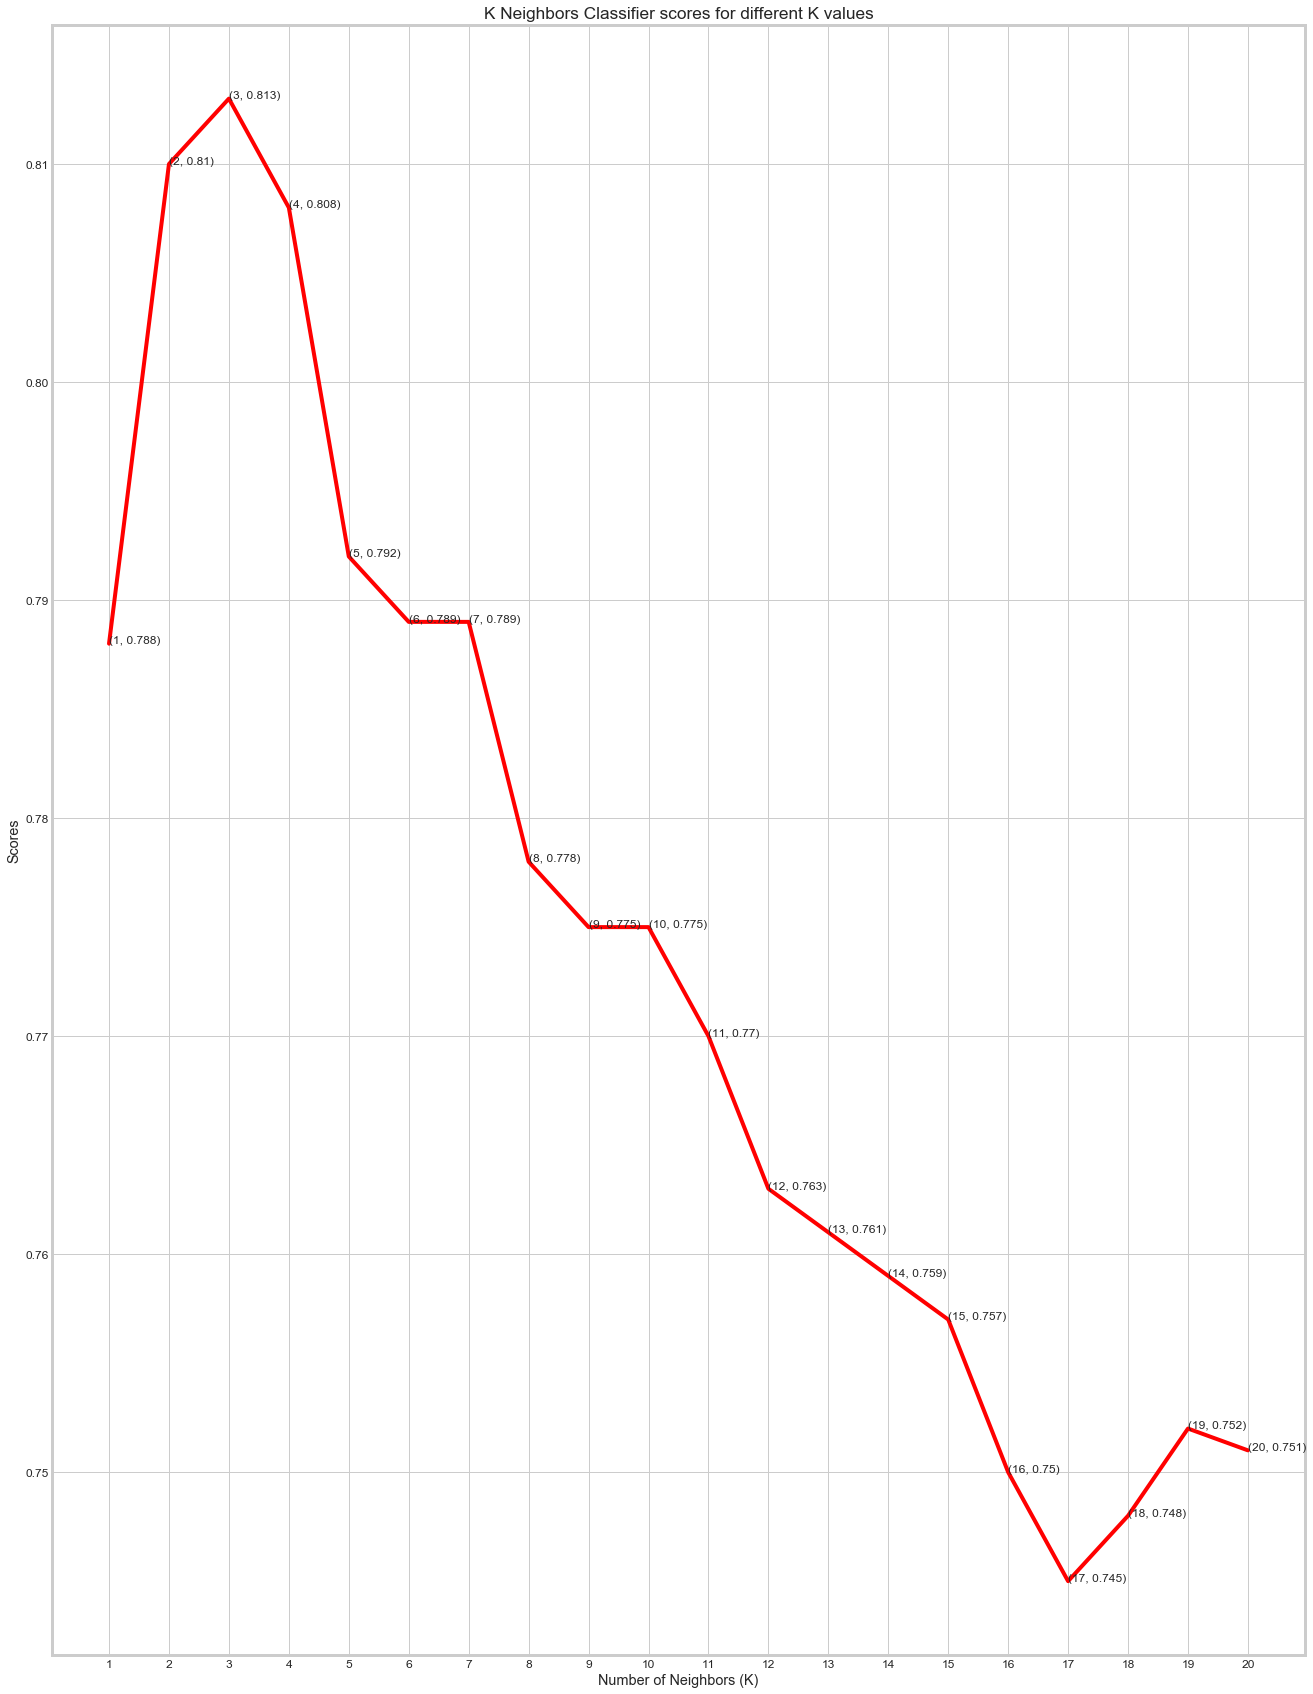

In [48]:
plt.figure(figsize=(20,30))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [49]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X2, y2)

KNeighborsClassifier(n_neighbors=2)

KNN Score: 
 85.19
KNN Test Score: 
 90.82
Accuracy: 
 0.9082125603864735
[[105   0]
 [ 19  83]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       105
           1       1.00      0.81      0.90       102

    accuracy                           0.91       207
   macro avg       0.92      0.91      0.91       207
weighted avg       0.92      0.91      0.91       207



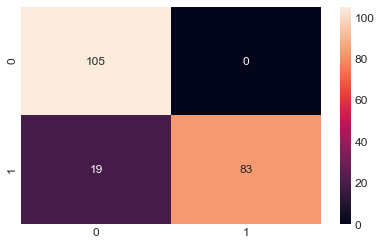

In [50]:
knn_predict_proba = knn.predict_proba(X2_test)
knn_predict = knn.predict(X2_test)

knn_score = round(knn.score(X2_train, y2_train) * 100, 2)
knn_score_test = round(knn.score(X2_test, y2_test) * 100, 2)
print('KNN Score: \n', knn_score)
print('KNN Test Score: \n', knn_score_test)
print('Accuracy: \n', accuracy_score(y2_test,knn_predict))
print(confusion_matrix(y2_test,knn_predict))
print(classification_report(y2_test,knn_predict))

sns.heatmap(confusion_matrix(y2_test,knn_predict),annot=True,fmt="d")

In [51]:
conf_matrix=confusion_matrix(y2_test,knn_predict)

total=sum(sum(conf_matrix))

knn_sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', knn_sensitivity )

knn_specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', knn_specificity)

Sensitivity :  0.8467741935483871
Specificity :  1.0


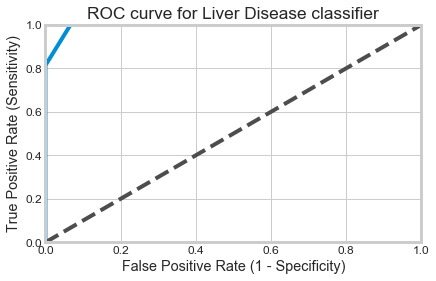

In [52]:
fpr, tpr, thresholds = roc_curve(y2_test, knn_predict_proba[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Liver Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [53]:
knn_auc = auc(fpr, tpr)
knn_auc

0.9937908496732026

### Random Forest

Random Forest Score: 
 100.0
Random Forest Test Score: 
 100.0
Accuracy: 
 1.0
[[127   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       122

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



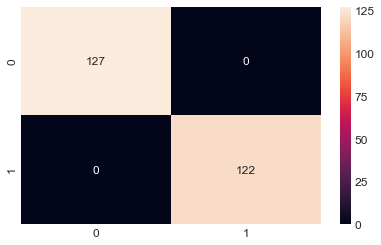

In [54]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
#Predict Output
rf_predicted = random_forest.predict(X_test)
rf_predict_proba = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

In [55]:
conf_matrix=confusion_matrix(y_test,rf_predicted)

total=sum(sum(conf_matrix))

rf_sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', rf_sensitivity )

rf_specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', rf_specificity)

Sensitivity :  1.0
Specificity :  1.0


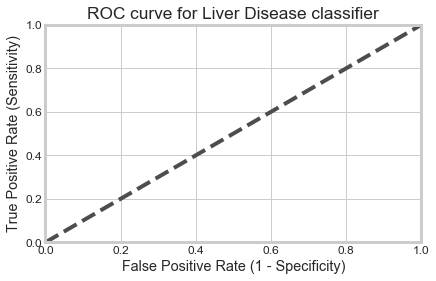

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, rf_predict_proba)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Liver Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [57]:
rf_auc = auc(fpr, tpr)
rf_auc

1.0

### Random Forest Optimization

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,10,6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [60]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf}

In [61]:
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, scoring='roc_auc', n_jobs=-1)

rf_grid.fit(X, y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='roc_auc')

In [62]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300)

Random Forest Optimized Score: 
 99.29
Random Forest Optimized Test Score: 
 98.75
Accuracy: 
 0.8955823293172691
[[127   0]
 [ 26  96]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       127
           1       1.00      0.79      0.88       122

    accuracy                           0.90       249
   macro avg       0.92      0.89      0.89       249
weighted avg       0.91      0.90      0.89       249



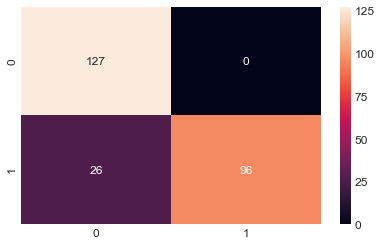

In [63]:
rf_grid_predict = rf_grid.predict(X_test)
rf_grid_pred_proba = rf_grid.predict_proba(X_test)[:, 1]

rf_grid_score = round(rf_grid.score(X_train, y_train) * 100, 2)
rf_grid_score_test = round(rf_grid.score(X_test, y_test) * 100, 2)
print('Random Forest Optimized Score: \n', rf_grid_score)
print('Random Forest Optimized Test Score: \n', rf_grid_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_grid_predict))
print(confusion_matrix(y_test,rf_grid_predict))
print(classification_report(y_test,rf_grid_predict))

sns.heatmap(confusion_matrix(y_test,rf_grid_predict),annot=True,fmt="d")

In [64]:
conf_matrix=confusion_matrix(y_test,rf_grid_predict)

total=sum(sum(conf_matrix))

rf_grid_sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', rf_grid_sensitivity )

rf_grid_specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', rf_grid_specificity)

Sensitivity :  0.8300653594771242
Specificity :  1.0


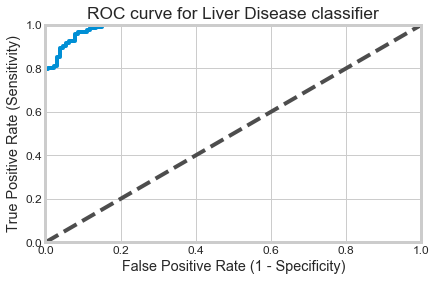

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, rf_grid_pred_proba)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Liver Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [66]:
rf_grid_auc = auc(fpr, tpr)
rf_grid_auc

0.9875435652510649

## Model Stacking

In [67]:
RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=800)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=800)

In [68]:
from sklearn.ensemble import StackingClassifier

# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('gnb', GaussianNB()))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 18)))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('rf', RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1200)))


# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
stacked_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
stacked_model.fit(X, y)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('gnb', GaussianNB()),
                               ('knn', KNeighborsClassifier(n_neighbors=18)),
                               ('cart', DecisionTreeClassifier()),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       n_estimators=1200))],
                   final_estimator=LogisticRegression())

Stacked Model Score: 
 98.27
Stacked Model Test Score: 
 97.59
Accuracy: 
 0.9759036144578314
[[126   1]
 [  5 117]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       127
           1       0.99      0.96      0.97       122

    accuracy                           0.98       249
   macro avg       0.98      0.98      0.98       249
weighted avg       0.98      0.98      0.98       249



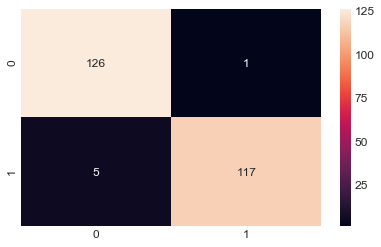

In [69]:
predict_proba = stacked_model.predict_proba(X_test)
predict = stacked_model.predict(X_test)

stacked_score = round(stacked_model.score(X_train, y_train) * 100, 2)
stacked_score_test = round(stacked_model.score(X_test, y_test) * 100, 2)

print('Stacked Model Score: \n', stacked_score)
print('Stacked Model Test Score: \n', stacked_score_test)
print('Accuracy: \n', accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

sns.heatmap(confusion_matrix(y_test, predict),annot=True,fmt="d")

In [70]:
conf_matrix=confusion_matrix(y_test,predict)

total=sum(sum(conf_matrix))

stacked_sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', stacked_sensitivity )

stacked_specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', stacked_specificity)

Sensitivity :  0.9618320610687023
Specificity :  0.9915254237288136


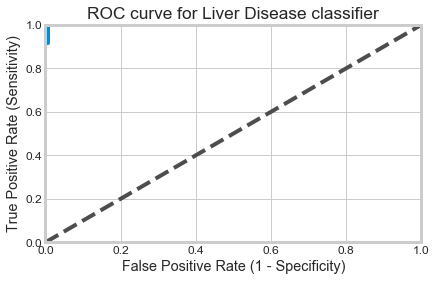

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Liver Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [72]:
stacked_auc = auc(fpr, tpr)
stacked_auc

0.9993545888731122

### Model evaluation

In [73]:
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes', 'KNN','Random Forest', 'Random Forest Optimized', 'Stacked Model'],
    'Score': [ logreg_score, gauss_score, knn_score, random_forest_score, rf_grid_score, stacked_score],
    'Test Score': [ logreg_score_test, gauss_score_test, knn_score_test, random_forest_score_test, rf_grid_score_test, stacked_score_test],
    'Sensitivity': [ lr_sensitivity, gnb_sensitivity, knn_sensitivity, rf_sensitivity, rf_grid_sensitivity, stacked_sensitivity],
    'Specificity': [ lr_specificity, gnb_specificity, knn_specificity, rf_specificity, rf_grid_specificity, stacked_specificity],
    'AUC Score': [ lr_auc, gnb_auc, knn_auc, rf_auc, rf_grid_auc, stacked_auc]})
models.sort_values(by='AUC Score', ascending=False)

,Model,Score,Test Score,Sensitivity,Specificity,AUC Score
3,Random Forest,100.00,100.00,1.000000,1.000000,1.000000
5,Stacked Model,98.27,97.59,0.961832,0.991525,0.999355
2,KNN,85.19,90.82,0.846774,1.000000,0.993791
4,Random Forest Optimized,99.29,98.75,0.830065,1.000000,0.987544
1,Gaussian Naive Bayes,69.95,72.29,0.670588,0.835443,0.744159
0,Logistic Regression,50.43,49.00,NaN,0.489960,0.743514


## Pickle the Model

In [74]:
import joblib

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1200)

X = df.drop('Target', 1)
y = df.Target

for var in X.columns:
    X[var] = np.log1p(X[var])

X, y = sm.fit_sample(X, y)
rf.fit(X, y)

joblib.dump(rf, './models/liver.pickle')

['./models/liver.pickle']

In [75]:
model = joblib.load('./models/liver.pickle')

In [76]:
y = df.Target
X = df.drop('Target',1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.72      1.00      0.83       414

    accuracy                           0.72       579
   macro avg       0.36      0.50      0.42       579
weighted avg       0.51      0.72      0.60       579



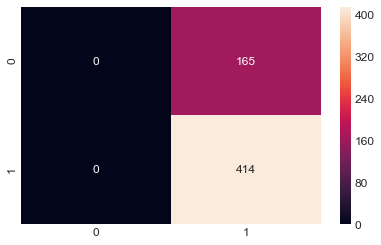

In [77]:
pred_proba = model.predict_proba(X)
pred = model.predict(X)

print(classification_report(y,pred))
sns.heatmap(confusion_matrix(y, pred),annot=True,fmt="d")

In [78]:
df[df.Target==0].iloc[:5]

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target,Gender_Male
1,60,0.7,174,32,7.8,4.2,1.1,0,1
2,60,2.2,271,45,6.1,2.9,0.9,0,1
5,53,0.9,210,35,8.0,3.9,0.9,0,0
9,52,0.6,178,26,6.5,3.6,1.2,0,1
10,49,2.0,209,48,5.7,3.0,1.1,0,1


In [79]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target', 'Gender_Male'],
      dtype='object')

In [80]:
df.iloc[0]

Age                            39.0
Total_Bilirubin                 0.6
Alkaline_Phosphotase          188.0
Alamine_Aminotransferase       28.0
Total_Protiens                  8.1
Albumin                         3.3
Albumin_and_Globulin_Ratio      0.6
Target                          1.0
Gender_Male                     1.0
Name: 0, dtype: float64

In [81]:
test = {
    "Age": 35.0,
    "Total_Bilirubin": 1.8,
    "Alkaline_Phosphotase": 275.0,
    "Alamine_Aminotransferase": 48.0,
    "Total_Protiens": 6.5,
    "Albumin": 3.2,
    "Albumin_and_Globulin_Ratio": 0.9,
    "Gender_Male": 1.0
}